# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [ ]:
from __future__ import absolute_import, division, print_function

In [ ]:
import tensorflow as tf
import numpy as np
rng = np.random

In [ ]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [ ]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


In [ ]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [ ]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [ ]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.250313, W: 0.376140, b: -0.083886
step: 100, loss: 0.229500, W: 0.361892, b: 0.017125
step: 150, loss: 0.213178, W: 0.349275, b: 0.106577
step: 200, loss: 0.200378, W: 0.338102, b: 0.185792
step: 250, loss: 0.190340, W: 0.328207, b: 0.255942
step: 300, loss: 0.182468, W: 0.319444, b: 0.318065
step: 350, loss: 0.176295, W: 0.311684, b: 0.373078
step: 400, loss: 0.171453, W: 0.304812, b: 0.421796
step: 450, loss: 0.167657, W: 0.298727, b: 0.464939
step: 500, loss: 0.164679, W: 0.293338, b: 0.503145
step: 550, loss: 0.162344, W: 0.288566, b: 0.536979
step: 600, loss: 0.160513, W: 0.284340, b: 0.566941
step: 650, loss: 0.159077, W: 0.280597, b: 0.593474
step: 700, loss: 0.157951, W: 0.277283, b: 0.616971
step: 750, loss: 0.157068, W: 0.274348, b: 0.637778
step: 800, loss: 0.156375, W: 0.271748, b: 0.656205
step: 850, loss: 0.155832, W: 0.269447, b: 0.672523
step: 900, loss: 0.155406, W: 0.267408, b: 0.686974
step: 950, loss: 0.155072, W: 0.265603, b: 0.699771
step: 1000, 

In [ ]:
import matplotlib.pyplot as plt

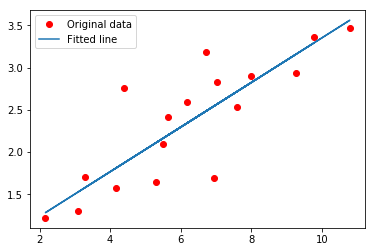

In [ ]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()